In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ast import increment_lineno
# Importación de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%pylab inline
%matplotlib inline



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
# guardo la ubicacion del excel en una variable y luego en un dataframe

ubicacion = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-salud/movimiento-hospitalario/mh_internacion.xlsx'
data = pd.read_excel(ubicacion, sheet_name='mh_internacion')

In [5]:
# traigo las columnas del dataframe
data.columns.values

array(['SERVICIO', 'ESPECIALIDADES', 'ING', 'PASES_A', 'ING_PASES',
       'ALTAS', 'DEF', 'TOTAL', 'PASES_B', 'EGR_PASES', 'DIAS_CAMAS_DISP',
       'PAC_DIA', 'PROMEDIO_CAMAS_DISP', 'PROMEDIO_PAC_DIA',
       'PORCENTAJE_OCUP', 'PROMEDIO_PERM', 'GIRO', 'TASA_MORT_HOSP',
       'ANIO', 'SK_ID_EFECTOR', 'NOM_EFECTOR_BADATA', 'OBSERVACIONES'],
      dtype=object)

In [6]:
# traigo las primeras filas del df para ver si se guardo correctamente
data.head()

,SERVICIO,ESPECIALIDADES,ING,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,PASES_B,EGR_PASES,...,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,NOM_EFECTOR_BADATA,OBSERVACIONES
0,Cirugia,Urologia,304,21.0,325.0,319.0,0.0,319.0,4.0,323.0,...,1292.0,499.0,3861.0,563.0,2501.0,0.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
1,Cirugia,Subtotal Cirugia,4661,634.0,5295.0,4616.0,27.0,4643.0,646.0,5289.0,...,13295.0,7213.0,5425.0,498.0,3978.0,51.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
2,Urgencia,Terapia Intensiva,101,236.0,337.0,3.0,62.0,65.0,273.0,338.0,...,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
3,Urgencia,Subtotal Urgencia,101,236.0,337.0,3.0,62.0,65.0,273.0,338.0,...,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
4,Urgencia,Total Hospital,9749,1592.0,11341.0,9633.0,124.0,9757.0,1592.0,11349.0,...,31812.0,21721.0,6828.0,813.0,3067.0,127.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN


In [7]:
# Eliminar filas para quedarme sólo con las que tienen el subtotal por servicio

# Crear una máscara booleana para las filas que contienen la palabra 'subtotal'
mask = data['ESPECIALIDADES'].str.contains('Subtotal', case=False, na=False)

# Filtrar el DataFrame para mantener solo las filas que contienen 'subtotal'
data = data[mask]

# Imprimir el DataFrame después de filtrar

data.head()


,SERVICIO,ESPECIALIDADES,ING,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,PASES_B,EGR_PASES,...,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,NOM_EFECTOR_BADATA,OBSERVACIONES
1,Cirugia,Subtotal Cirugia,4661,634.0,5295.0,4616.0,27.0,4643.0,646.0,5289.0,...,13295.0,7213.0,5425.0,498.0,3978.0,51.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
3,Urgencia,Subtotal Urgencia,101,236.0,337.0,3.0,62.0,65.0,273.0,338.0,...,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
7,Pediatria,Subtotal Pediatria,6536,1612.0,8148.0,6481.0,69.0,6550.0,1614.0,8164.0,...,14986.0,8535.0,5696.0,382.0,5448.0,85.0,2011,2167,HOSPITAL MATERNO INFANTIL R. SARDA,NaN
9,Tocoginecologia,Subtotal Tocoginecologia,8015,214.0,8229.0,8064.0,0.0,8064.0,152.0,8216.0,...,10388.0,8721.0,8395.0,387.0,7909.0,0.0,2011,2167,HOSPITAL MATERNO INFANTIL R. SARDA,NaN
12,Urgencia,Subtotal Urgencia,125,50.0,175.0,61.0,4.0,65.0,110.0,175.0,...,7.0,182.0,2595.0,379.0,25.0,229.0,2011,2167,HOSPITAL MATERNO INFANTIL R. SARDA,NaN


In [8]:
# renombro los nombres de algunas columnas para que tengan más sentido
data.rename(columns = {'ING':'INGRESOS', 'ING_PASES': 'SUMA_INGRESOS_PASES_A',
       'DEF':'EGRESOS_DEFUNCION', 'TOTAL':'SUMA_ALTAS_DEFUNCIONES', 'EGR_PASES':'SUMA_EGRESOS_PASES_B', 'DIAS_CAMAS_DISP':'DIAS_CAMAS_DISPONIBLES',
       'PAC_DIA':'PACIENTES_DIAS', 'PROMEDIO_CAMAS_DISP':'PROMEDIO_CAMAS_DISPONIBLES', 'PROMEDIO_PAC_DIA':'PROMEDIO_PACIENTES_DIA',
       'PORCENTAJE_OCUP':'PORCENTAJE_OCUPACION', 'PROMEDIO_PERM':'PROMEDIO_PERMANENCIA', 'GIRO':'GIRO_CAMA', 'TASA_MORT_HOSP':'TASA_MORTALIDAD',
       'SK_ID_EFECTOR':'ID_EFECTOR', 'NOM_EFECTOR_BADATA':'NOMBRE_EFECTOR_BADATA'}, inplace = True)

In [9]:
# importo más librerias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Reviso cómo se guardaron las columnas
data.columns.values

array(['SERVICIO', 'ESPECIALIDADES', 'INGRESOS', 'PASES_A',
       'SUMA_INGRESOS_PASES_A', 'ALTAS', 'EGRESOS_DEFUNCION',
       'SUMA_ALTAS_DEFUNCIONES', 'PASES_B', 'SUMA_EGRESOS_PASES_B',
       'DIAS_CAMAS_DISPONIBLES', 'PACIENTES_DIAS',
       'PROMEDIO_CAMAS_DISPONIBLES', 'PROMEDIO_PACIENTES_DIA',
       'PORCENTAJE_OCUPACION', 'PROMEDIO_PERMANENCIA', 'GIRO_CAMA',
       'TASA_MORTALIDAD', 'ANIO', 'ID_EFECTOR', 'NOMBRE_EFECTOR_BADATA',
       'OBSERVACIONES'], dtype=object)

In [11]:
# Crear un nuevo DataFrame con ciertas columnas eliminadas

data2 = data.drop(columns=['ESPECIALIDADES','SUMA_INGRESOS_PASES_A','SUMA_ALTAS_DEFUNCIONES', 'SUMA_EGRESOS_PASES_B','PROMEDIO_PACIENTES_DIA','PROMEDIO_CAMAS_DISPONIBLES', 'PACIENTES_DIAS','PORCENTAJE_OCUPACION','ID_EFECTOR','OBSERVACIONES'])

In [12]:
# Traigo columnas para comprobar que se borraron correctamente
data2.columns.values

array(['SERVICIO', 'INGRESOS', 'PASES_A', 'ALTAS', 'EGRESOS_DEFUNCION',
       'PASES_B', 'DIAS_CAMAS_DISPONIBLES', 'PROMEDIO_PERMANENCIA',
       'GIRO_CAMA', 'TASA_MORTALIDAD', 'ANIO', 'NOMBRE_EFECTOR_BADATA'],
      dtype=object)

In [13]:
# Chequeo existencia de nulos

data2.isnull().sum()/len(data)*100

SERVICIO                  0.0
INGRESOS                  0.0
PASES_A                   0.0
ALTAS                     0.0
EGRESOS_DEFUNCION         0.0
PASES_B                   0.0
DIAS_CAMAS_DISPONIBLES    0.0
PROMEDIO_PERMANENCIA      0.0
GIRO_CAMA                 0.0
TASA_MORTALIDAD           0.0
ANIO                      0.0
NOMBRE_EFECTOR_BADATA     0.0
dtype: float64

In [14]:
# Eliminar filas con valores nulos

data3 = data2.dropna()

In [15]:
# Vuelvo a comprobar si existen valores nulos

data3.isnull().sum()/len(data)*100

SERVICIO                  0.0
INGRESOS                  0.0
PASES_A                   0.0
ALTAS                     0.0
EGRESOS_DEFUNCION         0.0
PASES_B                   0.0
DIAS_CAMAS_DISPONIBLES    0.0
PROMEDIO_PERMANENCIA      0.0
GIRO_CAMA                 0.0
TASA_MORTALIDAD           0.0
ANIO                      0.0
NOMBRE_EFECTOR_BADATA     0.0
dtype: float64

In [16]:
# Chequeo si hay datos duplicados

print(data3.duplicated().sum())

0


In [17]:
# Ejecuto un describe sobre la tabla

data3.describe()

,INGRESOS,PASES_A,ALTAS,EGRESOS_DEFUNCION,PASES_B,DIAS_CAMAS_DISPONIBLES,PROMEDIO_PERMANENCIA,GIRO_CAMA,TASA_MORTALIDAD,ANIO
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,1716.899281,374.643165,1648.575540,64.601439,377.541007,25665.290647,1127.798561,3216.105036,384.787050,2013.974101
std,1589.935264,422.299386,1601.197083,96.008650,483.453285,43246.548696,2686.472184,3216.820592,701.762251,1.991167
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000,2011.000000
25%,418.000000,47.500000,374.000000,1.000000,53.000000,8523.500000,133.000000,356.000000,5.000000,2012.000000
50%,1354.000000,271.000000,1308.000000,18.000000,215.000000,14946.000000,479.000000,2824.000000,66.000000,2014.000000
75%,2720.500000,533.000000,2396.000000,83.000000,517.500000,27324.000000,951.500000,4629.000000,492.500000,2016.000000
max,8015.000000,2238.000000,8064.000000,504.000000,2348.000000,355823.000000,24728.000000,18596.000000,4209.000000,2017.000000


In [18]:
# La desviacion estandar es mayor que la media en todas las columnas, lo cual indica una gran dispersión de los valores y la existencia de otliers o valores atípicos

In [19]:
#Reviso los valores de las columnas que tienen valores categoricos SERVICIO, NOMBRE_EFECTOR_BADATA

print(data3["SERVICIO"].unique())

['Cirugia' 'Urgencia' 'Pediatria' 'Tocoginecologia' 'Medicina'
 'Internacion De Corta Estadia' 'Area Indiferenciada'
 'Cuidados Genereales - Area Indiferenciada' 'Cuidados Especiales'
 'Cuidados Grales - Area Indiferenciada']


In [20]:
print(data3["NOMBRE_EFECTOR_BADATA"].unique())

['HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ'
 'HOSPITAL MATERNO INFANTIL R. SARDA' 'HOSPITAL DE INFECCIOSAS F. MUÑIZ'
 'HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE'
 'HOSPITAL DE QUEMADOS DR. ARTURO UMBERTO ILLIA'
 'HOSPITAL DE GASTROENTEROLOGIA B. UDAONDO'
 'HOSPITAL OFTALMOLOGICO DR. PEDRO LAGLEYZE'
 'HOSPITAL DE OFTALMOLOGIA SANTA LUCIA'
 'HOSPITAL DE SALUD MENTAL J. T. BORDA'
 'HOSPITAL DE SALUD MENTAL BRAULIO MOYANO'
 'HOSPITAL INFANTO JUVENIL C. TOBAR GARCIA'
 'HOSPITAL DE EMERGENCIAS PSIQUIATRICAS TORCUATO DE ALVEAR'
 'HOSPITAL DE REHABILITACION M. ROCCA'
 'INSTITUTO DE REHABILITACION PSICOFISICA (I.R.E.P.)'
 'HOSPITAL DE REHABILITACION RESPIRATORIA MARIA FERRER'
 'HOSPITAL GENERAL DE AGUDOS DR. T. ALVAREZ'
 'HOSPITAL GENERAL DE AGUDOS DR C. ARGERICH'
 'HOSPITAL GENERAL DE AGUDOS DR. C. DURAND'
 'HOSPITAL GENERAL DE AGUDOS DR. J. A. FERNANDEZ'
 'HOSPITAL GENERAL DE AGUDOS J. A. PENNA'
 'HOSPITAL GENERAL DE AGUDOS P. PIÑERO'
 'HOSPITAL GENERAL DE AGUDOS DR. I. PIROVANO'
 'HOSPI

In [21]:
# Transformo los datos categóricos a numéricos

data3['SERVICIO'] = data3['SERVICIO'].map({
    'Cirugia':1,
    'Urgencia':2,
    'Pediatria':3,
    'Tocoginecologia':4,
    'Medicina':5,
    'Internacion De Corta Estadia':6,
    'Area Indiferenciada':7,
    'Cuidados Genereales - Area Indiferenciada':8,
    'Cuidados Especiales':9,
    'Cuidados Grales - Area Indiferenciada':10
})

In [22]:
# Asigno valores por tipo de hospital (1: General, 2: de niños, 3: especializados-de infecciosas, oncologico, etc.-, 4: de salud mental)

data3['NOMBRE_EFECTOR_BADATA'] = data3['NOMBRE_EFECTOR_BADATA'].map({
 'HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ':2,
 'HOSPITAL MATERNO INFANTIL R. SARDA':2,
 'HOSPITAL DE INFECCIOSAS F. MUÑIZ':3,
 'HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE':3,
 'HOSPITAL DE QUEMADOS DR. ARTURO UMBERTO ILLIA':3,
 'HOSPITAL DE GASTROENTEROLOGIA B. UDAONDO':3,
 'HOSPITAL OFTALMOLOGICO DR. PEDRO LAGLEYZE':3,
 'HOSPITAL DE OFTALMOLOGIA SANTA LUCIA':3,
 'HOSPITAL DE SALUD MENTAL J. T. BORDA':4,
 'HOSPITAL DE SALUD MENTAL BRAULIO MOYANO':4,
 'HOSPITAL INFANTO JUVENIL C. TOBAR GARCIA':4,
 'HOSPITAL DE EMERGENCIAS PSIQUIATRICAS TORCUATO DE ALVEAR':4,
 'HOSPITAL DE REHABILITACION M. ROCCA':3,
 'INSTITUTO DE REHABILITACION PSICOFISICA (I.R.E.P.)':3,
 'HOSPITAL DE REHABILITACION RESPIRATORIA MARIA FERRER':3,
 'HOSPITAL GENERAL DE AGUDOS DR. T. ALVAREZ':1,
 'HOSPITAL GENERAL DE AGUDOS DR C. ARGERICH':1,
 'HOSPITAL GENERAL DE AGUDOS DR. C. DURAND':1,
 'HOSPITAL GENERAL DE AGUDOS DR. J. A. FERNANDEZ':1,
 'HOSPITAL GENERAL DE AGUDOS J. A. PENNA':1,
 'HOSPITAL GENERAL DE AGUDOS P. PIÑERO':1,
 'HOSPITAL GENERAL DE AGUDOS DR. I. PIROVANO':1,
 'HOSPITAL GENERAL DE AGUDOS J. M. RAMOS MEJIA':1,
 'HOSPITAL GENERAL DE AGUDOS B. RIVADAVIA':1,
 'HOSPITAL GENERAL DE AGUDOS DONACION F. SANTOJANNI':1,
 'HOSPITAL GENERAL DE AGUDOS DR. E. TORNU':1,
 'HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD':1,
 'HOSPITAL GENERAL DE AGUDOS A. ZUBIZARRETA':1,
 'HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE':1
})

In [23]:
# Imprimo el dataframe para corroborar que los valores se guardaron correctamente

print(data3)

      SERVICIO  INGRESOS  PASES_A   ALTAS  EGRESOS_DEFUNCION  PASES_B  \
1            1      4661    634.0  4616.0               27.0    646.0   
3            2       101    236.0     3.0               62.0    273.0   
7            3      6536   1612.0  6481.0               69.0   1614.0   
9            4      8015    214.0  8064.0                0.0    152.0   
12           2       125     50.0    61.0                4.0    110.0   
...        ...       ...      ...     ...                ...      ...   
2797         5       630    202.0   777.0               19.0     46.0   
2799         2       283     38.0    97.0               31.0    194.0   
2806         1         0     30.0     3.0                1.0     20.0   
2809         1         0     75.0    16.0                3.0     58.0   
2811         4      1838      5.0  1842.0                0.0     10.0   

      DIAS_CAMAS_DISPONIBLES  PROMEDIO_PERMANENCIA  GIRO_CAMA  \
1                    48525.0                 498.0     397

In [24]:
# Calculo la correlación de cada variable independiente (x) con la varible dependiente (Y)

correlaciones = data3.corr()['PROMEDIO_PERMANENCIA']
print(correlaciones)

SERVICIO                  0.180543
INGRESOS                 -0.217151
PASES_A                   0.045408
ALTAS                    -0.190919
EGRESOS_DEFUNCION        -0.097849
PASES_B                  -0.015265
DIAS_CAMAS_DISPONIBLES    0.482603
PROMEDIO_PERMANENCIA      1.000000
GIRO_CAMA                -0.222299
TASA_MORTALIDAD          -0.025771
ANIO                      0.016526
NOMBRE_EFECTOR_BADATA     0.351589
Name: PROMEDIO_PERMANENCIA, dtype: float64


In [25]:
# Filtro con las columnas que tienen una correlación entre 0.1 y 1 y -0.1 y -1

feature_selection = correlaciones[abs(correlaciones) > 0.1].index

In [26]:
# Genero un dataframe solo con las variables seleccionadas

data4 = data3[feature_selection]

print(data3.shape)
print(data4.shape)

(695, 12)
(695, 7)


In [27]:
print(data4)

      SERVICIO  INGRESOS   ALTAS  DIAS_CAMAS_DISPONIBLES  \
1            1      4661  4616.0                 48525.0   
3            2       101     3.0                  6089.0   
7            3      6536  6481.0                 54699.0   
9            4      8015  8064.0                 37916.0   
12           2       125    61.0                  2555.0   
...        ...       ...     ...                     ...   
2797         5       630   777.0                  3860.0   
2799         2       283    97.0                  2793.0   
2806         1         0     3.0                  3650.0   
2809         1         0    16.0                 11680.0   
2811         4      1838  1842.0                  8790.0   

      PROMEDIO_PERMANENCIA  GIRO_CAMA  NOMBRE_EFECTOR_BADATA  
1                    498.0     3978.0                      2  
3                   1509.0     2026.0                      2  
7                    382.0     5448.0                      2  
9                    387.0 

In [28]:
data4.columns.values

array(['SERVICIO', 'INGRESOS', 'ALTAS', 'DIAS_CAMAS_DISPONIBLES',
       'PROMEDIO_PERMANENCIA', 'GIRO_CAMA', 'NOMBRE_EFECTOR_BADATA'],
      dtype=object)

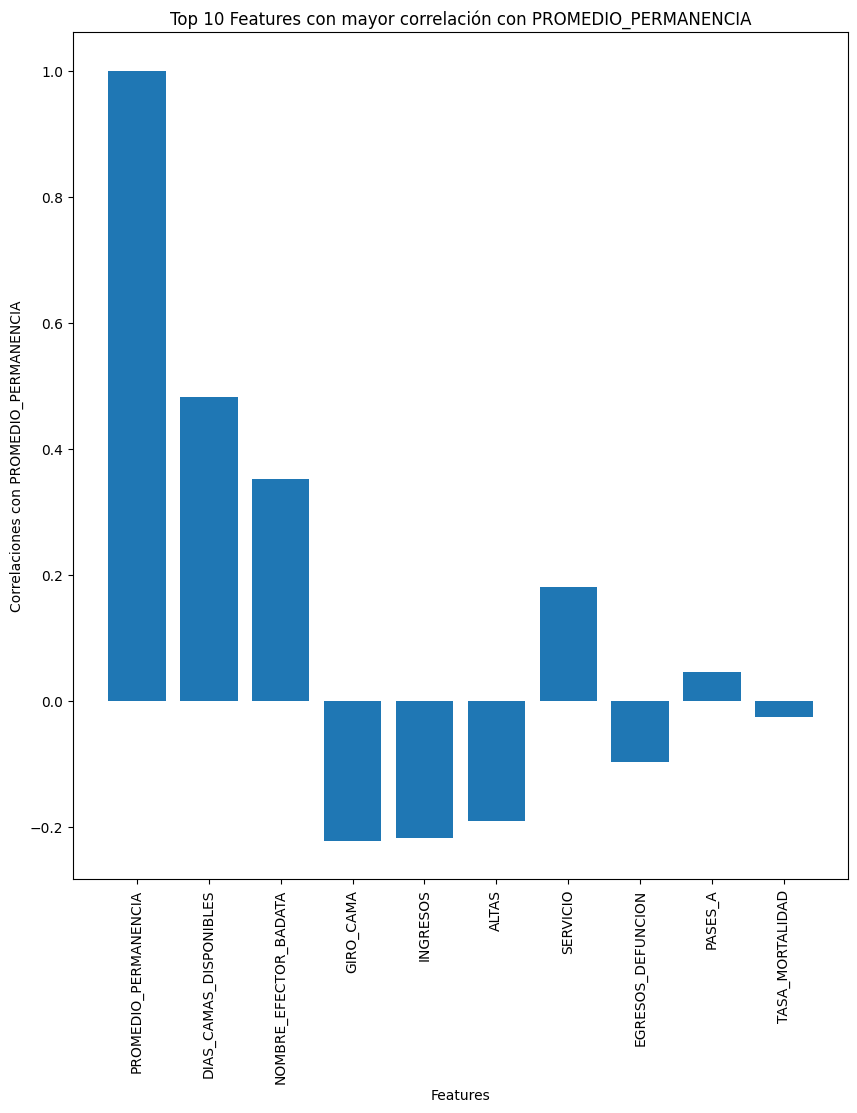

In [29]:
top_10_features = correlaciones.abs().nlargest(10).index
top_10_corr_values = correlaciones[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlaciones con PROMEDIO_PERMANENCIA')
plt.title('Top 10 Features con mayor correlación con PROMEDIO_PERMANENCIA')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Interpretación:
# cuanto más aumenta la disponibilidad de camas, mayor es la permanencia de las personas internadas;
# Cuanto más disminuye el giro-cama, mayor es el numero de días que permanece internada una persona;
# cuantos menos ingresos y altas hay, mayor es el tiempo que las personas permanecen internadas;

In [31]:
print(data4)

      SERVICIO  INGRESOS   ALTAS  DIAS_CAMAS_DISPONIBLES  \
1            1      4661  4616.0                 48525.0   
3            2       101     3.0                  6089.0   
7            3      6536  6481.0                 54699.0   
9            4      8015  8064.0                 37916.0   
12           2       125    61.0                  2555.0   
...        ...       ...     ...                     ...   
2797         5       630   777.0                  3860.0   
2799         2       283    97.0                  2793.0   
2806         1         0     3.0                  3650.0   
2809         1         0    16.0                 11680.0   
2811         4      1838  1842.0                  8790.0   

      PROMEDIO_PERMANENCIA  GIRO_CAMA  NOMBRE_EFECTOR_BADATA  
1                    498.0     3978.0                      2  
3                   1509.0     2026.0                      2  
7                    382.0     5448.0                      2  
9                    387.0 

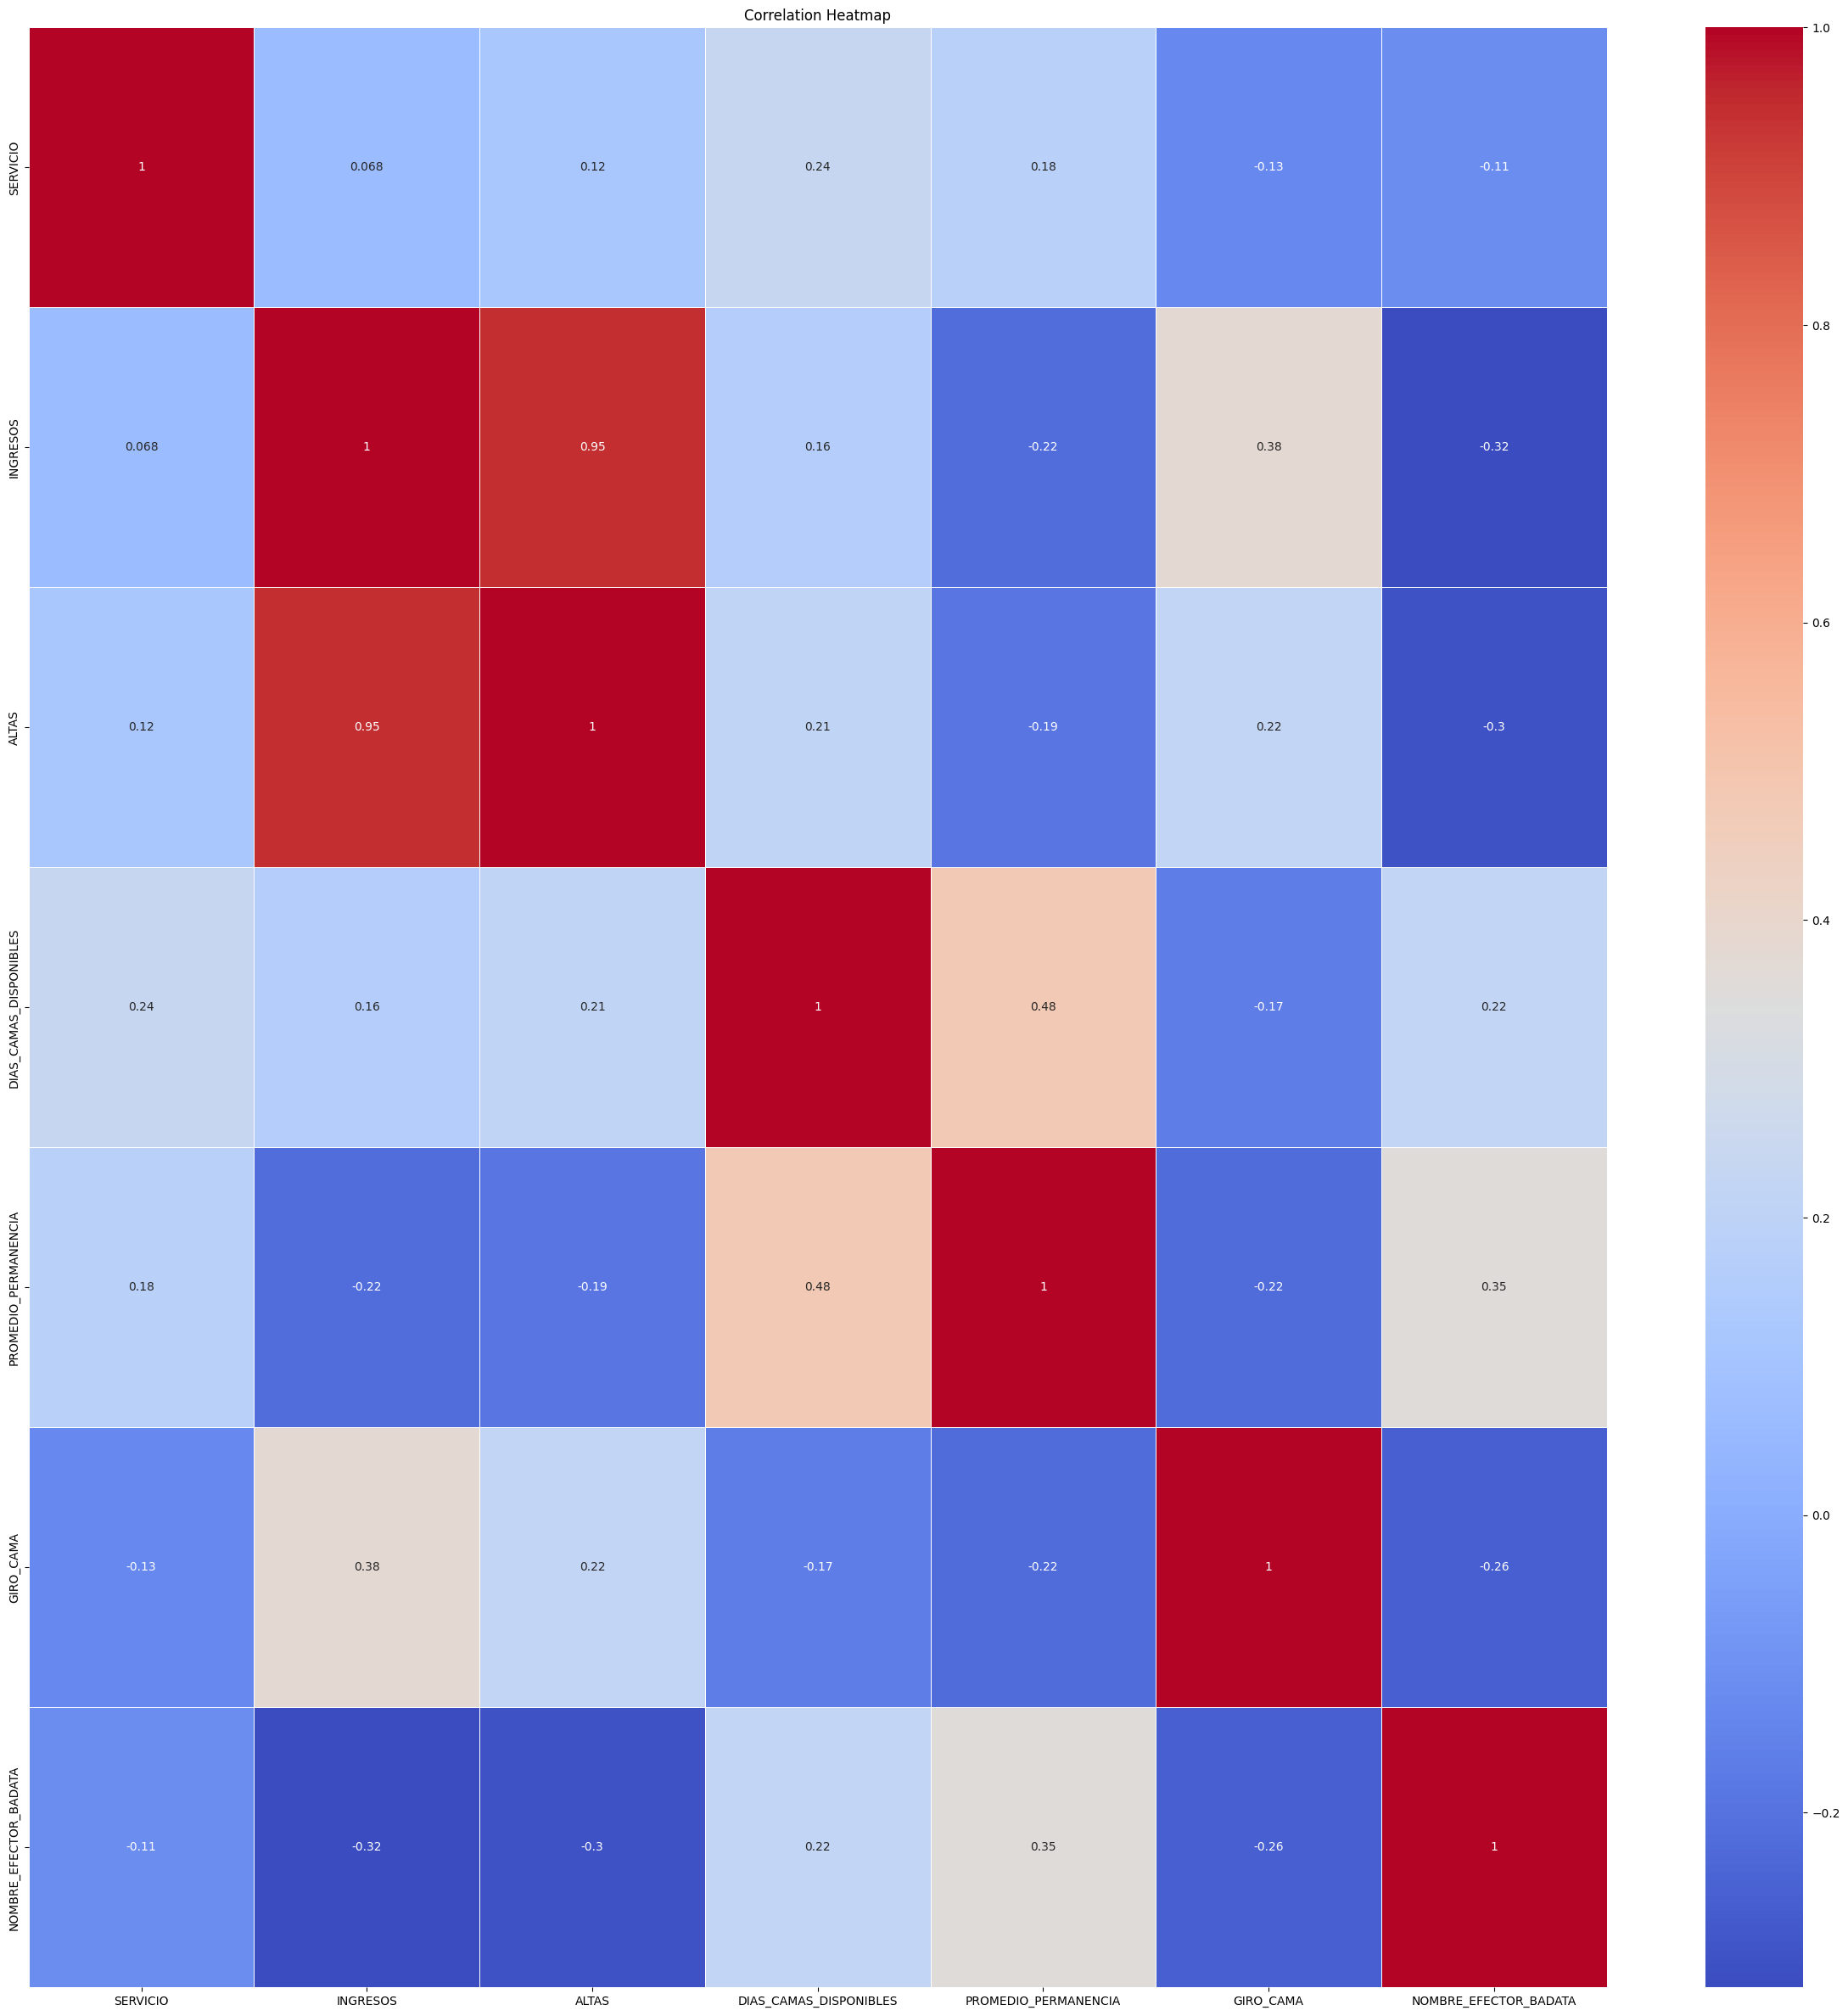

In [32]:
plt.figure(figsize=(30, 30))
sns.heatmap(data4.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Para hacerla fácil, armamos una lista con las columnas a normalizar
columns_to_normalize = ['SERVICIO', 'INGRESOS', 'ALTAS', 'DIAS_CAMAS_DISPONIBLES','PROMEDIO_PERMANENCIA', 'GIRO_CAMA', 'NOMBRE_EFECTOR_BADATA']

# Z-score
scaler = StandardScaler() # instanciamos el objeto que escala
data4[columns_to_normalize] = scaler.fit_transform(data4[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar

data4

C:\Users\Niki\AppData\Local\Temp\ipykernel_28160\2376130011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns_to_normalize] = scaler.fit_transform(data4[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


,SERVICIO,INGRESOS,ALTAS,DIAS_CAMAS_DISPONIBLES,PROMEDIO_PERMANENCIA,GIRO_CAMA,NOMBRE_EFECTOR_BADATA
1,-1.191969,1.853045,1.854588,0.528971,-0.234602,0.237018,0.276366
3,-0.629185,-1.017062,-1.028456,-0.452993,0.141999,-0.370230,0.276366
7,-0.066400,3.033187,3.020181,0.671837,-0.277813,0.694320,0.276366
9,0.496384,3.964084,4.009528,0.283480,-0.275950,1.459912,0.276366
12,-0.629185,-1.001956,-0.992207,-0.534769,-0.278930,-0.992720,0.276366
...,...,...,...,...,...,...,...
2797,1.059168,-0.684105,-0.544719,-0.504572,-0.278930,1.476400,1.241566
2799,-0.629185,-0.902510,-0.969708,-0.529262,-0.395524,0.308568,1.241566
2806,-1.191969,-1.080633,-1.028456,-0.509431,-0.378388,-0.999875,2.206766
2809,-1.191969,-1.080633,-1.020331,-0.323618,-0.396269,-0.999875,2.206766


In [35]:
# Decision Tree
# Importar las librerías necesarias
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definir la función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Generar predicciones con el modelo ya entrenado usando las variables predictoras de test
    y_pred = model.predict(X_test)

    # Calcular métricas comparando mi predicción de y de test contra los valores reales
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimir resultados
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Devolver modelo y predicciones para poder guardar los objetos
    return model, y_pred

# Selección de variables independientes (X) y la variable objetivo (y)
X = data4[['DIAS_CAMAS_DISPONIBLES', 'GIRO_CAMA', 'NOMBRE_EFECTOR_BADATA']]
y = data4['PROMEDIO_PERMANENCIA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
dt_model = DecisionTreeRegressor(random_state=42)

# Evaluar el modelo
dt_model, dt_pred = evaluate_model(dt_model, X_train, X_test, y_train, y_test)


Mean Squared Error: 0.7531020442768813
R^2 Score: 0.1511369536882582


In [36]:
# Usar RandomForestRegressor

from sklearn.model_selection import train_test_split

# Selección de variables independientes (X) y la variable objetivo (y)
X = data4[['DIAS_CAMAS_DISPONIBLES', 'GIRO_CAMA', 'NOMBRE_EFECTOR_BADATA']]
y = data4['PROMEDIO_PERMANENCIA']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=13)


In [37]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=13)

In [38]:
y_pred = rfr.predict(x_test)

In [39]:
mean_squared_error(y_pred, y_test)

np.float64(0.11664617764641659)

In [40]:
r2_score(y_pred, y_test)

0.4152721996370963